In [ ]:
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('log_temp.csv',header=None)
df.head()

In [ ]:
df=df.rename(columns={0:'Date',1:'Time_Stamp',2:'Temperature',3:'Humidity'})

In [ ]:
df.head()

In [ ]:
#df.info()
df=df.loc[df['Temperature']!='error']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 335
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         320 non-null    object
 1   Time_Stamp   320 non-null    object
 2   Temperature  320 non-null    object
 3   Humidity     320 non-null    object
dtypes: object(4)
memory usage: 12.5+ KB


In [ ]:
df['Temperature'] = df['Temperature'].astype(str).str.replace('T=', '')
df['Humidity'] = df['Humidity'].astype(str).str.replace('H=', '')
df['Temperature']=pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity']=pd.to_numeric(df['Humidity'], errors='coerce')
#df['Temperature']=pd.to_numeric(df['Temperature'], errors='coerce').fillna(0.0)
#df['Humidity']=pd.to_numeric(df['Humidity'], errors='coerce').fillna(0.0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 335
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         320 non-null    object 
 1   Time_Stamp   320 non-null    object 
 2   Temperature  320 non-null    float64
 3   Humidity     320 non-null    float64
dtypes: float64(2), object(2)
memory usage: 12.5+ KB


In [ ]:
df.shape

(320, 4)

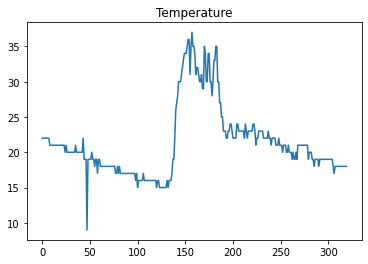

--------------


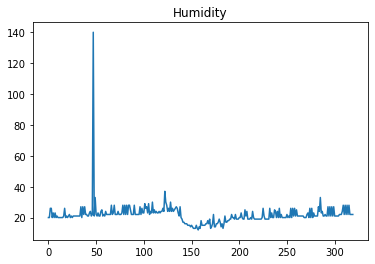

--------------


In [ ]:
ct=0
full_columns=['Temperature','Humidity']
for i in range(2,df.shape[1]):
  plt.plot(df.values[:, i:i+1])
  plt.title(df.columns[i])
  plt.show()
  print('--------------')
  ct+=1

##LSTM_APPROACH

In [ ]:
import math
val=math.floor(80/100*len(df))-1
train_data=df.iloc[:val, 2:].values

In [ ]:
train_data.shape

(255, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_s = scaler.fit_transform(train_data)

In [ ]:
train_s.shape

(255, 2)

In [ ]:
X_train = []
y_train = []
for i in range(3, val):
    X_train.append(train_s[i-3:i, 0:])
    y_train.append(train_s[i, 0:])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
X_train.shape

(252, 3, 2)

In [ ]:
test_data=df.iloc[val:, 2:].values
print(test_data.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
test_s = scaler.fit_transform(test_data)
X_test = []
y_test = []
for i in range(3, len(df)-val):
    X_test.append(test_s[i-3:i, 0:])
    y_test.append(test_s[i, 0:])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)

(65, 2)
(62, 3, 2)


In [ ]:
seq = Sequential()
seq.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 2)))
seq.add(LSTM(units = 50, return_sequences = True))
seq.add(Dropout(0.2))

seq.add(LSTM(units = 50, return_sequences = True))
seq.add(Dropout(0.2))

seq.add(LSTM(units = 50))

seq.add(Dense(units = 2))

seq.compile(optimizer = 'adam', loss = 'mean_squared_error',  metrics=['accuracy'])

hist=seq.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data=(X_test, y_test))
seq.save('lstm.hdf5')

Epoch 1/10
8/8 [==============================] - 9s 248ms/step - loss: 0.1155 - accuracy: 0.8770 - val_loss: 0.1856 - val_accuracy: 0.8065
Epoch 2/10
8/8 [==============================] - 0s 17ms/step - loss: 0.0716 - accuracy: 0.9960 - val_loss: 0.1048 - val_accuracy: 0.8065
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 0.0276 - accuracy: 0.9960 - val_loss: 0.0531 - val_accuracy: 0.8065
Epoch 4/10
8/8 [==============================] - 0s 15ms/step - loss: 0.0212 - accuracy: 0.9960 - val_loss: 0.0629 - val_accuracy: 0.8065
Epoch 5/10
8/8 [==============================] - 0s 17ms/step - loss: 0.0167 - accuracy: 0.9960 - val_loss: 0.0674 - val_accuracy: 0.8065
Epoch 6/10
8/8 [==============================] - 0s 15ms/step - loss: 0.0149 - accuracy: 0.9960 - val_loss: 0.0571 - val_accuracy: 0.8065
Epoch 7/10
8/8 [==============================] - 0s 17ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0512 - val_accuracy: 0.8065
Epoch 8/10
8/8 [==========

In [ ]:
test_data=df.iloc[val:, 2:].values
print(test_data.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
test_s = scaler.fit_transform(test_data)
X_test = []
y_test = []
for i in range(1, len(df)-val):
    X_test.append(test_s[i-1:i, 0:])
    y_test.append(test_s[i, 0:])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)

'''X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))
predicted_stock_price = seq.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)'''

(65, 2)
(64, 1, 2)


'X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))\npredicted_stock_price = seq.predict(X_test)\npredicted_stock_price = scaler.inverse_transform(predicted_stock_price)'

In [ ]:
'''X_test = []
y_test = []
for i in range(val,):
    X_test.append(train_s[i-20:i, 0:])
    y_test.append(train_s[i, 0:])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
predicted_stock_price = seq.predict(X_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
print(predicted_stock_price)'''

'X_test = []\ny_test = []\nfor i in range(val,):\n    X_test.append(train_s[i-20:i, 0:])\n    y_test.append(train_s[i, 0:])\nX_train, y_train = np.array(X_train), np.array(y_train)\n\nX_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))\npredicted_stock_price = seq.predict(X_train)\npredicted_stock_price = scaler.inverse_transform(predicted_stock_price)\nprint(predicted_stock_price)'

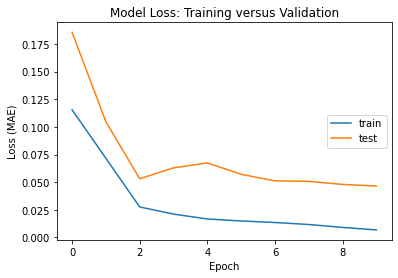

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss: Training versus Validation')
plt.ylabel('Loss (MAE)')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

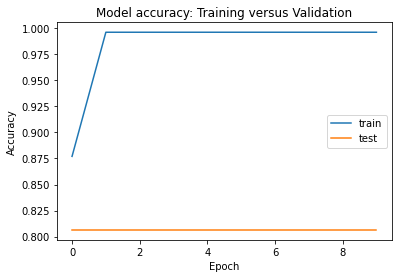

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy: Training versus Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()